### Infinite dSprites

#### Introduction
The 'InfiniteDSprites` dataset is an infinite streams of 2D sprites undergoing translation, rotation, and scaling. It is an extension of [dSprites](https://github.com/deepmind/dsprites-dataset).

#### Quick start
To start, create an instance of `InfiniteDSprites`. It is a subclass of PyTorch `IterableDataset`, so it is possible to iterate over it using a `DataLoader`.

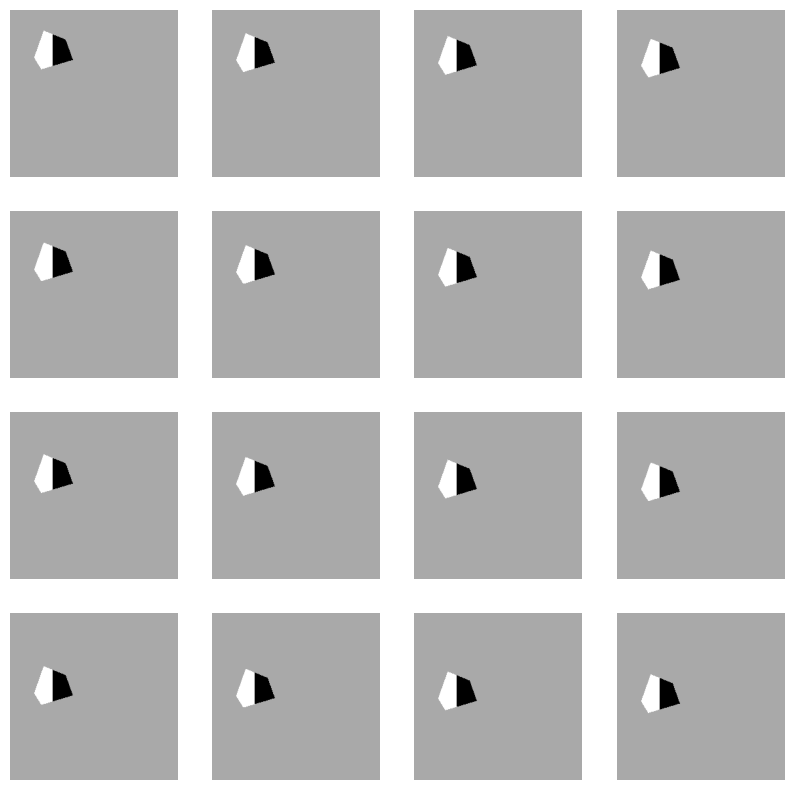

tensor([0.0000, 0.0323, 0.0645, 0.0968, 0.1290, 0.1613, 0.1935, 0.2258, 0.2581,
        0.2903, 0.3226, 0.3548, 0.3871, 0.4194, 0.4516, 0.4839],
       dtype=torch.float64)


In [18]:
from torch.utils.data import DataLoader
import numpy as np

import idsprites as ids
from idsprites.visualization import draw_batch

np.random.seed(0)
dataset = ids.InfiniteDSprites()
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, save=False, show=True)
print(factors.position_y)

#### Fine-grained control
The dataset has many dials that you can turn to adjust the distribution of the data. In particular, you can control the dataset size, the image size and the range of variability of the generative factors. You can also pass a list of shapes to iterate over: 

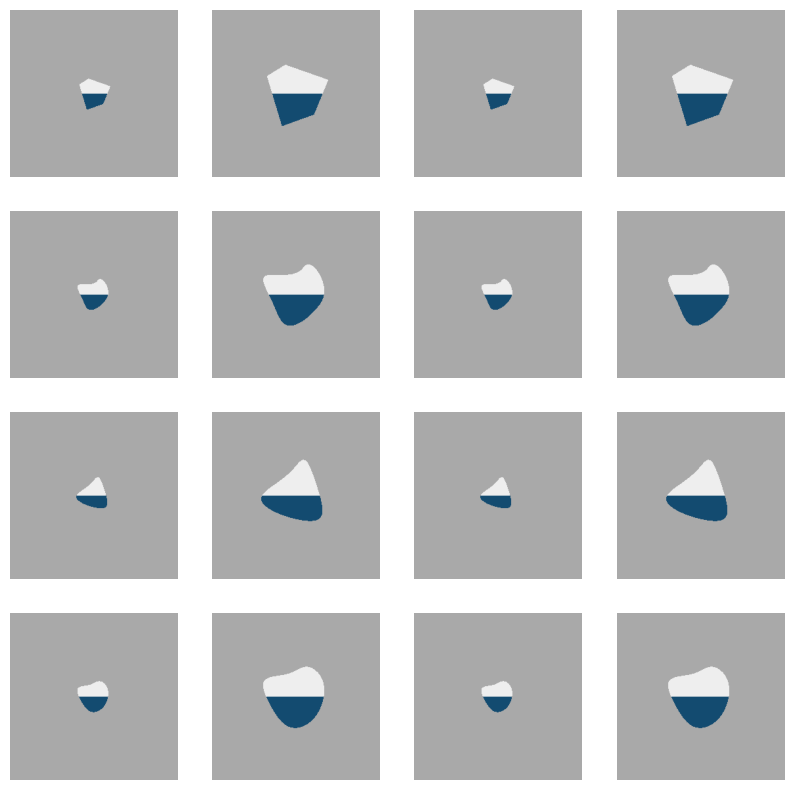

tensor([0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000,
        0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000],
       dtype=torch.float64)


In [22]:
np.random.seed(0)

generate_shape = ids.InfiniteDSprites().generate_shape
shapes = [generate_shape() for _ in range(4)]
shapes = [shape for shape in shapes for _ in range(2)] # duplicate each shape

dataset = ids.InfiniteDSprites(
    img_size=256,
    color_range=["#EEEEEE"],
    orientation_marker_color="#134B70",
    shapes=shapes,
    scale_range = [0.4, 0.8],
    orientation_range= [0.5 * np.pi],
    position_x_range= [0.5],
    position_y_range= [0.5],
    orientation_marker=True,
)
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, save=False, show=True)

print(factors.scale)

By default, the resulting images will be an exhaustive product of these ranges in the order of (shape, color, scale, orientation, position_x, position_y). Think about it as an odometer, with the rightmost element advancing at every iteration.


> **NOTE**: the order in the `Factors` namedtuple is also (shape, color, scale, orientation, position_x, position_y), which is different from dSprites. In any case, it is advisable to access each factor by name.

#### Subclasses
Use the `RandomDSprites` subclass to sample random values of each factor from an appropriate range at each step:

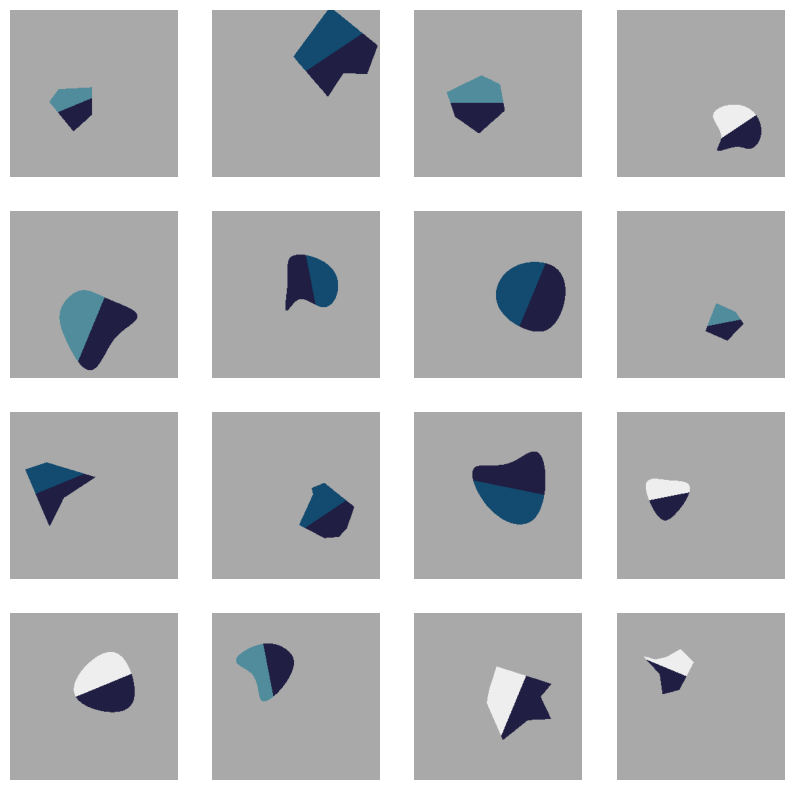

tensor([0.2581, 0.9677, 0.2581, 0.9355, 0.4839, 0.6774, 0.9032, 0.7742, 0.0323,
        0.8710, 0.6774, 0.0968, 0.6452, 0.1613, 0.7097, 0.1613],
       dtype=torch.float64)


In [23]:
np.random.seed(0)
dataset = ids.RandomDSprites(img_size=256, color_range=["#134B70", "#508C9B", "#EEEEEE"], orientation_marker_color="#201E43")
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
draw_batch(batch_img, save=False, show=True)
print(factors.position_x)

Both `InfinteDSprites` and `RandomDSprites` come with map-style versions, `InfiniteDSpritesMap` and `RandomDSpritesMap`, respectively. These are useful when you want to access the dataset by index. When instantiating these classes, you have to provide the dataset_size or shapes argument:

In [24]:
resolution = 4
generate_shape = ids.InfiniteDSprites().generate_shape
shapes = [generate_shape() for _ in range(10)]

dataset = ids.RandomDSpritesMap(
    dataset_size=1000,
    shapes=shapes,
    scale_range= np.linspace(0.4, 0.8, resolution),
    orientation_range= np.linspace(0, np.pi, resolution),
    position_x_range= np.linspace(0, 1, resolution),
    position_y_range= np.linspace(0, 1, resolution),
)
print(dataset.targets)
batch_img = dataset.data

[1, 3, 8, 0, 0, 0, 7, 7, 0, 0, 1, 4, 3, 8, 1, 8, 8, 1, 7, 1, 2, 4, 5, 3, 8, 5, 3, 8, 7, 8, 4, 0, 3, 1, 5, 4, 1, 5, 7, 0, 0, 8, 0, 2, 6, 5, 8, 1, 5, 1, 6, 0, 5, 4, 6, 0, 7, 0, 9, 5, 0, 9, 0, 8, 5, 6, 4, 3, 6, 3, 2, 8, 2, 3, 4, 6, 9, 6, 5, 3, 4, 1, 6, 2, 5, 6, 1, 7, 4, 4, 0, 6, 1, 9, 6, 5, 6, 3, 1, 8, 5, 6, 1, 5, 8, 9, 8, 7, 3, 7, 2, 5, 8, 0, 7, 4, 0, 1, 2, 1, 5, 9, 9, 3, 9, 1, 4, 0, 6, 4, 6, 9, 4, 5, 2, 3, 3, 0, 5, 3, 4, 1, 3, 3, 1, 7, 5, 4, 6, 7, 5, 5, 3, 4, 1, 4, 7, 4, 4, 8, 5, 3, 2, 1, 3, 0, 3, 5, 6, 2, 8, 6, 5, 5, 1, 2, 7, 8, 7, 5, 8, 9, 3, 4, 8, 7, 7, 8, 1, 2, 8, 3, 9, 8, 2, 5, 1, 0, 7, 8, 7, 1, 7, 7, 8, 6, 7, 7, 7, 3, 5, 5, 1, 6, 4, 6, 4, 8, 8, 6, 2, 0, 1, 3, 5, 0, 8, 7, 0, 7, 3, 1, 0, 5, 2, 5, 9, 9, 6, 7, 0, 7, 9, 7, 9, 6, 3, 0, 9, 4, 7, 6, 2, 7, 1, 4, 9, 1, 0, 2, 6, 7, 9, 2, 2, 8, 7, 1, 3, 1, 6, 6, 0, 1, 9, 5, 0, 6, 9, 1, 3, 4, 4, 3, 0, 9, 1, 0, 5, 4, 5, 1, 6, 6, 8, 2, 3, 8, 1, 1, 4, 6, 0, 7, 6, 3, 8, 9, 2, 0, 2, 1, 1, 4, 7, 0, 5, 7, 7, 0, 5, 4, 2, 7, 4, 2, 5, 3, 5, 7, 9, 3, 4, 